In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from call import read_scenarios
from analysis import get_table, plot_by_tec, pdc_pivot, plot_energy_balance, Data_handler, plot_hydrogen_balance, plot_co2_emissions, plot_mv, add_zeros, plot_by_tec_and_hour
from IPython.display import HTML

%load_ext autoreload
%autoreload 2

In [2]:
#code from: http://blog.nextgenetics.net/?e=102
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [3]:
focus_region = 'GER'
#focus_scenario = '2016'
scenario_file = 'scenarios_DEMO' + '.yaml'

scenarios = read_scenarios(scenario_file)
dh = Data_handler(scenarios);

# Electricity

## Capacity

### Capacity in all regions

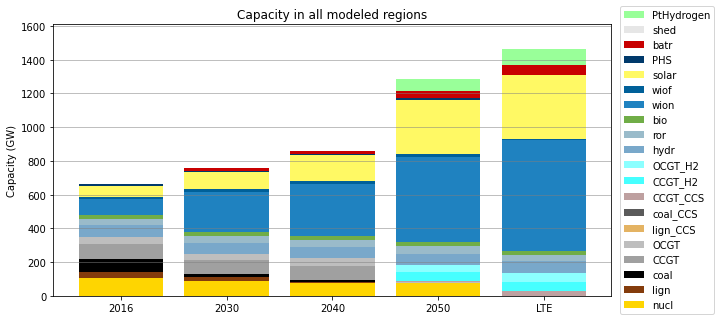

In [4]:
df = dh.get('o_capa')
df = df.loc[[i for i in df.index.levels[0] if i != 'shed']]
alltec = get_table(dh.scenarios,next(iter(dh.scenarios)),'alltec',use_name = True)['alltec'].values
plot_by_tec(
    df.groupby(['alltec']).sum(),
    alltec,
    ylabel='Capacity (GW)',
    figsize = (10, 5))
plt.title('Capacity in all modeled regions');

### Capacity in focus region

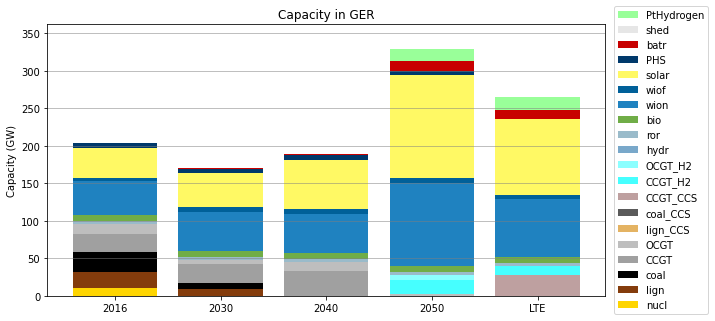

In [5]:
df = dh.get('o_capa')
df = df.loc[[i for i in df.index.levels[0] if i != 'shed']]
alltec = get_table(dh.scenarios,next(iter(dh.scenarios)),'alltec',use_name = True)['alltec'].values
plot_by_tec(
    df.groupby(['alltec', 'r']).sum().xs(focus_region, level='r'),
    alltec,
    ylabel='Capacity (GW)',
    figsize = (10, 5))
plt.title('Capacity in {}'.format(focus_region));

## Balance

### Electricity balance in all regions

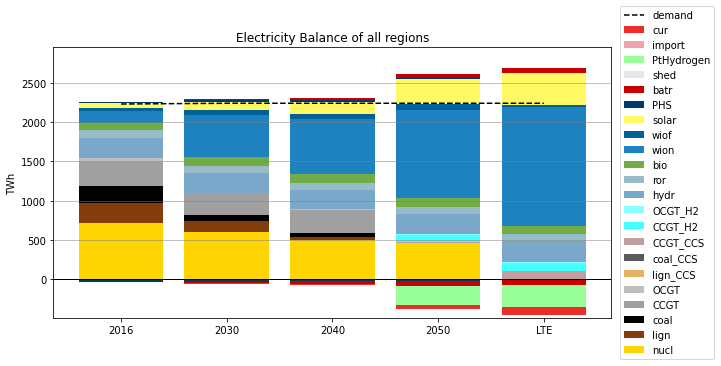

In [6]:
plot_energy_balance(dh,figsize = (10, 5),show_data=False);

### Electricity balance in focus region

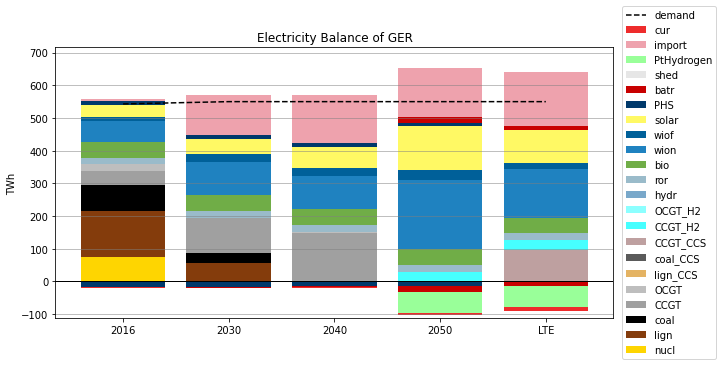

In [7]:
plot_energy_balance(dh,focus_region,figsize = (10, 5),show_data=False);

## Electricity Prices

### Baseload Prices of all regions

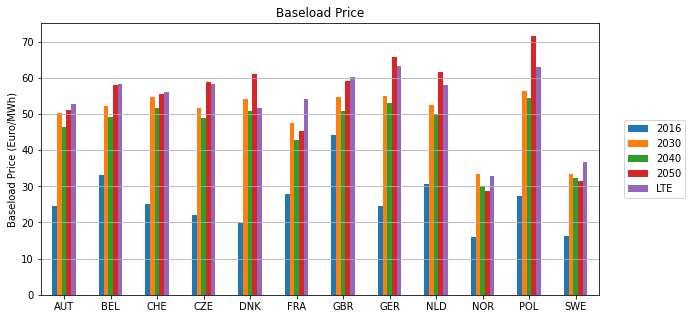

In [8]:
dh.get('o_prices').groupby('r').mean().transpose().T.plot.bar(xlabel = '', ylabel = 'Baseload Price (Euro/MWh)', rot = 0,figsize = (10, 5))
plt.legend(loc='center', bbox_to_anchor=(1.1, 0.5))
plt.grid(axis='y')
plt.title('Baseload Price');

### Price duration curve of focus region

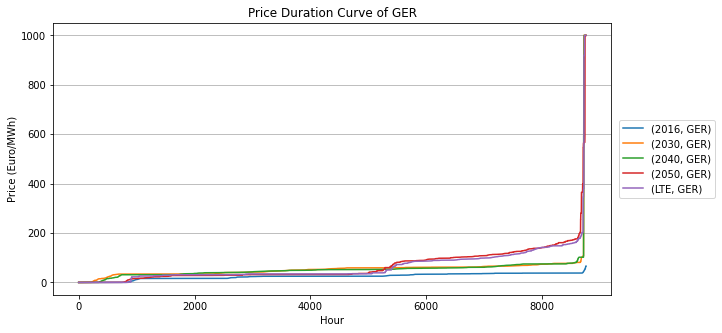

In [9]:
pdc_pivot(dh.get('o_prices'), region=focus_region).plot(xlabel='Hour', ylabel= 'Price (Euro/MWh)',figsize = (10, 5))
plt.grid(axis='y')
plt.legend(loc='center', bbox_to_anchor=(1.1, 0.5))
plt.title('Price Duration Curve of {}'.format(focus_region));

### Market value

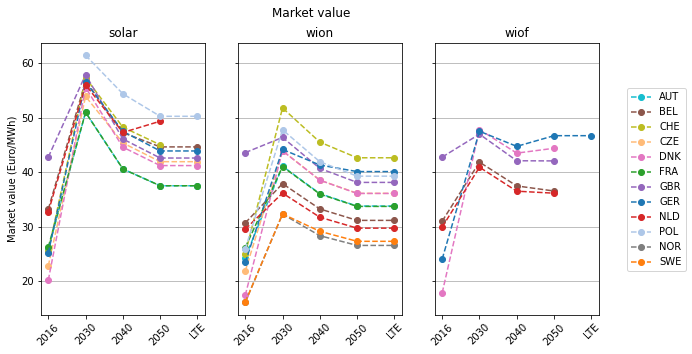

In [10]:
plot_mv(dh,['solar','wion','wiof'],show_data=False);

## Hydrogen

### Hydrogen balance of all regions

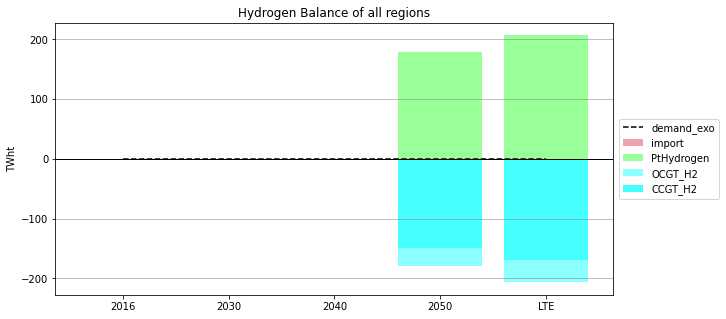

In [11]:
plot_hydrogen_balance(dh,figsize = (10, 5),show_data=False);

### Hydrogen balance of focus region

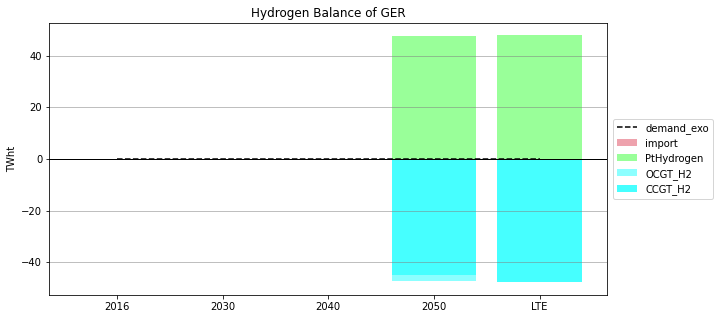

In [12]:
plot_hydrogen_balance(dh,focus_region,figsize = (10, 5),show_data=False);

### Hydrogen Prices

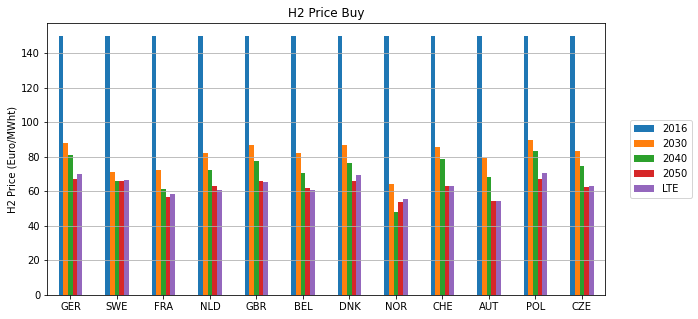

In [13]:
dh.get('o_h2price_buy').transpose().T.plot.bar(xlabel = '', ylabel = 'H2 Price (Euro/MWht)', rot = 0,figsize = (10, 5))
plt.legend(loc='center', bbox_to_anchor=(1.1, 0.5))
plt.grid(axis='y')
plt.title('H2 Price Buy');

# CO2 Emissions

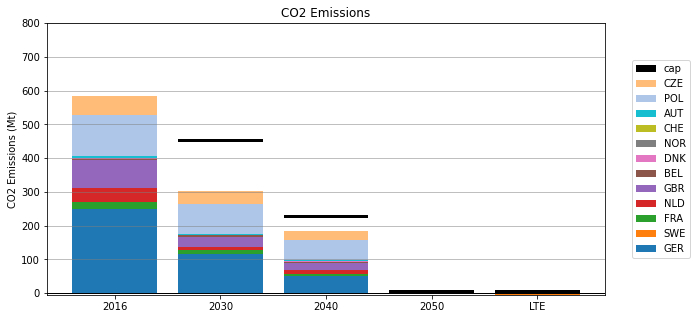

In [14]:
plot_co2_emissions(dh,figsize = (10, 5),show_data=False);

# Transmissions

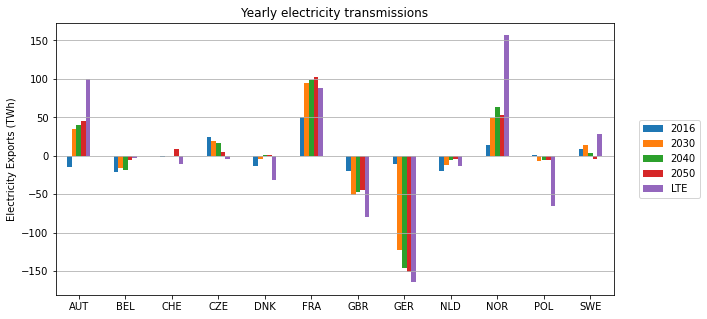

In [15]:
dh.get('o_flow').groupby('r').sum().div(1000).transpose().T.plot.bar(xlabel = '', ylabel = 'Electricity Exports (TWh)', rot = 0,figsize = (10, 5))
plt.legend(loc='center', bbox_to_anchor=(1.1, 0.5))
plt.grid(axis='y')
plt.title('Yearly electricity transmissions');